## Importing the libraries

In [91]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Loading the dataset

In [92]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [93]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [95]:
X=pd.DataFrame()
X['Age']=dataset['Age']
X['EstimatedSalary']=dataset['EstimatedSalary']
y=pd.DataFrame()
y['Purchased']=dataset['Purchased']

In [96]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [97]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


## Print count of each label in Purchased column

In [98]:
y['Purchased']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

## Print Correlation of each feature in the dataset

In [99]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

## Train the model with random_state = 0

In [101]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

## Print the prediction results

In [102]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Create dataframe with the Actual Purchased and Predict Purchased

In [103]:
test_dataset= pd.DataFrame()
test_dataset['Actual_Purchased']= y_test
test_dataset['Predict_Purchased']=y_pred

In [104]:
(test_dataset['Actual_Purchased'] == test_dataset['Predict_Purchased']).value_counts()

True     65
False    35
dtype: int64

## Print Confusion Matrix and classification_report

In [105]:
from sklearn.metrics import classification_report, confusion_matrix 
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[65,  0],
       [35,  0]])

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        65
           1       0.00      0.00      0.00        35

    accuracy                           0.65       100
   macro avg       0.33      0.50      0.39       100
weighted avg       0.42      0.65      0.51       100



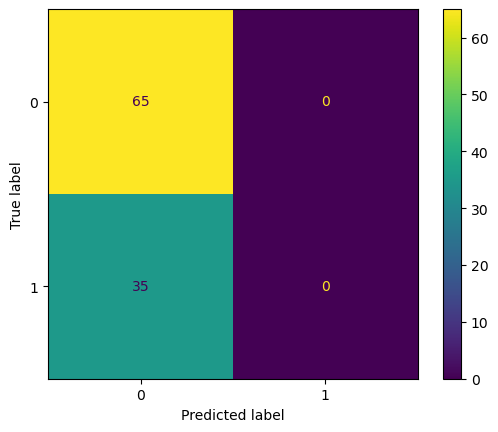

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix_chart=ConfusionMatrixDisplay(cnf_matrix)
matrix_chart.plot()
plt.show()

## Use StandardScaler() to improved performance and re-train your model

In [108]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [109]:
object= StandardScaler()
scale = object.fit_transform(X) 

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        65
           1       0.00      0.00      0.00        35

    accuracy                           0.65       100
   macro avg       0.33      0.50      0.39       100
weighted avg       0.42      0.65      0.51       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [111]:
logreg.predict([[30,90000]])

array([0])

## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [112]:
logreg.predict([[30,90000]])

array([0])

# Second: k-nearest neighbors model

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [119]:
print(confusion_matrix(y_test,pred))

[[55 10]
 [14 21]]


In [120]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        65
           1       0.68      0.60      0.64        35

    accuracy                           0.76       100
   macro avg       0.74      0.72      0.73       100
weighted avg       0.76      0.76      0.76       100

